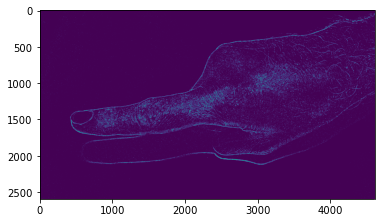

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (36).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian blur to smooth the image
blur = cv2.GaussianBlur(thresh, (5, 5), 0)

# Apply morphological closing operation to fill any small holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(closed)


# Save the hand image without shadow
plt.figure()
plt.imshow(hand)


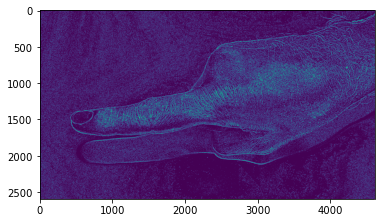

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (36).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the YUV color space
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(yuv)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
y_clahe = clahe.apply(y)
yuv_clahe = cv2.merge((y_clahe, u, v))
img_clahe = cv2.cvtColor(yuv_clahe, cv2.COLOR_YUV2BGR)

# Convert the image to grayscale
gray_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_clahe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian blur to smooth the image
blur = cv2.GaussianBlur(thresh, (5, 5), 0)

# Apply morphological closing operation to fill any small holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(closed)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()

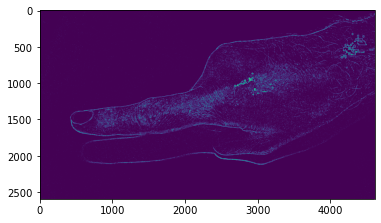

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (36).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian blur to smooth the image
blur = cv2.GaussianBlur(thresh, (5, 5), 0)

# Apply morphological closing operation to fill any small holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(closed)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()

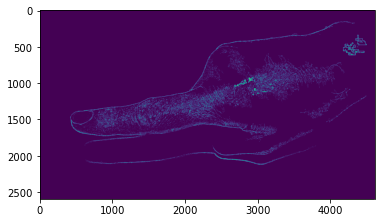

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (36).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Gaussian blur to smooth the image
blur = cv2.GaussianBlur(thresh, (5, 5), 0)

# Apply morphological closing operation to fill any small holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(blur, cv2.MORPH_CLOSE, kernel)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(closed)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(hand, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(hand)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)
hand_mask = cv2.morphologyEx(hand_mask, cv2.MORPH_CLOSE, kernel)
hand_mask = cv2.morphologyEx(hand_mask, cv2.MORPH_OPEN, kernel)
hand = cv2.bitwise_and(hand, hand_mask)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()


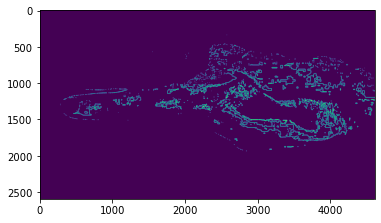

In [65]:
# this
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (49).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(closed)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(closed, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()


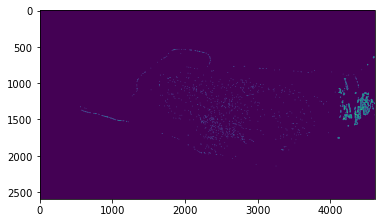

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (10).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(closed)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(closed, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Apply histogram equalization to enhance the appearance of the hand region
hand = cv2.equalizeHist(hand)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()

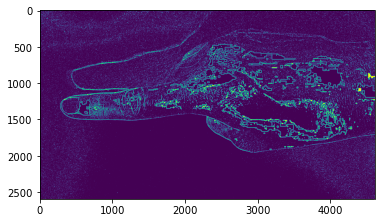

In [40]:
# python
# Copy
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (31).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(opened)
for cnt in contours:
    if cv2.contourArea(cnt) > 5000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(opened, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Save the hand image without shadow
plt.figure()
plt.imshow(hand)
plt.show()

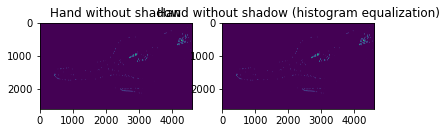

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (36).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(closed)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(closed, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Enhance the appearance of the hand region with histogram equalization
hand_eq = cv2.equalizeHist(hand)

# Save the hand image without shadow and with histogram equalization
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(hand)
plt.title('Hand without shadow')
plt.subplot(1, 2, 2)
plt.imshow(hand_eq)
plt.title('Hand without shadow (histogram equalization)')
plt.show()

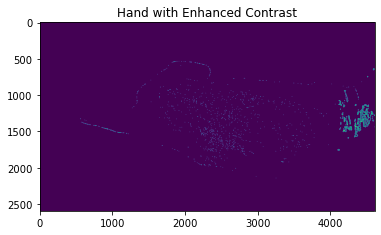

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (10).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(closed)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(closed, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Apply histogram equalization to enhance the contrast
equalized = cv2.equalizeHist(hand)

# Save the hand image without shadow and with enhanced contrast
plt.figure()
# plt.subplot(1, 2, 1)
# plt.imshow(hand)
# plt.title('Hand without Shadow')
# plt.subplot(1, 2, 2)
plt.imshow(equalized)
plt.title('Hand with Enhanced Contrast')
plt.show()

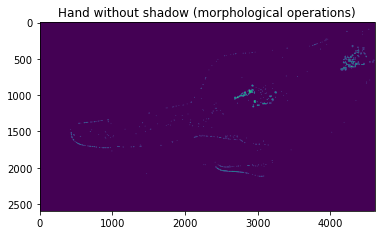

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Dataset_0-5-001/men/1/1_men (29).JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove the shadow using the RGB color space
b, g, r = cv2.split(img)
bg_diff = cv2.absdiff(b, g)
br_diff = cv2.absdiff(b, r)
shadow_mask = cv2.bitwise_and(bg_diff, br_diff)
_, shadow_mask = cv2.threshold(shadow_mask, 35, 255, cv2.THRESH_BINARY)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
shadow_mask = cv2.merge([shadow_mask, shadow_mask, shadow_mask])
img_no_shadow = cv2.subtract(img, shadow_mask)

# Convert the image to grayscale
gray_no_shadow = cv2.cvtColor(img_no_shadow, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to convert the image to a binary image
thresh = cv2.adaptiveThreshold(gray_no_shadow, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Remove noise from the binary image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Remove small contours and fill holes in the hand region
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
hand_mask = np.zeros_like(closed)
for cnt in contours:
    if cv2.contourArea(cnt) > 10000:
        cv2.drawContours(hand_mask, [cnt], 0, (255, 255, 255), -1)

# Remove any remaining artifacts from the shadow
shadow_mask = cv2.bitwise_not(hand_mask)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)
shadow_mask = cv2.morphologyEx(shadow_mask, cv2.MORPH_CLOSE, kernel)
shadow_mask = cv2.bitwise_not(shadow_mask)

# Apply the mask to remove the shadow
hand = cv2.bitwise_and(closed, shadow_mask)

# Invert the image to get the hand region as white and the background as black
hand = cv2.bitwise_not(hand)

# Apply morphological operations to enhance the hand features
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
hand = cv2.morphologyEx(hand, cv2.MORPH_CLOSE, kernel)
hand = cv2.morphologyEx(hand, cv2.MORPH_OPEN, kernel)

# Save the hand image without shadow and with morphological operations applied
plt.figure()
# plt.subplot(1, 2, 1)
# plt.imshow(hand)
# plt.title('Hand without shadow')
# plt.subplot(1, 2, 2)
plt.imshow(hand_eq)
plt.title('Hand without shadow (morphological operations)')
plt.show()